In [1]:
#LETS WORK WITH CIFAR 10 DATA 

#ABOUT CIFAR 10 

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.



In [2]:
#STEP 1 : LOAD CIFAR 10 DATA

In [3]:
#SECTION1 REQUIRED LIBRARY 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision
import torchvision.transforms as transforms



In [4]:
%rm -r /content/SWAG_DNN

rm: cannot remove '/content/SWAG_DNN': No such file or directory


In [5]:
!git clone https://github.com/jitendramishra1024/SWAG_DNN.git

Cloning into 'SWAG_DNN'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 53 (delta 22), reused 34 (delta 9), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [6]:
%cd SWAG_DNN

/content/SWAG_DNN


In [7]:
!ls utils

classcount.py  perClassResult.py	    regularizer.py  useful_utils.py
Dataloader.py  plot_misclassified_image.py  show_images.py


In [8]:
from SWAG_DNN.utils import Dataloader 
from SWAG_DNN.utils import show_images
from SWAG_DNN.utils import classcount
from SWAG_DNN.utils import perClassResult
from SWAG_DNN.utils import plot_misclassified_image
from SWAG_DNN.utils import useful_utils
from SWAG_DNN.models import BasicModel
from SWAG_DNN.trainer import train
from SWAG_DNN.trainer import test

In [9]:
#DOWNLOAD THE IMAGES 

class Args:

    # Data Loading
    # ============

    num_workers = 4
    batch_size = 128
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=0.001)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

    # Regularization
    # ==============
    #dropout = 0.1
    dropout = 0

    # Training
    # ========
    random_seed = 1
    epochs = 15
    learning_rate = 0.01
    momentum = 0.9
    weight_decay=0.001
    step_size=6
    gamma=0.1


In [10]:
trainloader,testloader=Dataloader.train_test_loader(Args.batch_size,Args.num_workers)
classes = Dataloader.get_classes()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [11]:
#get mean and std of data set 
dataset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = Dataloader.calculate_mean_std(dataset)
print(mean,std)

Files already downloaded and verified
[0.4913996160030365, 0.48215851187705994, 0.44653093814849854] [0.20230093598365784, 0.19941268861293793, 0.2009616196155548]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

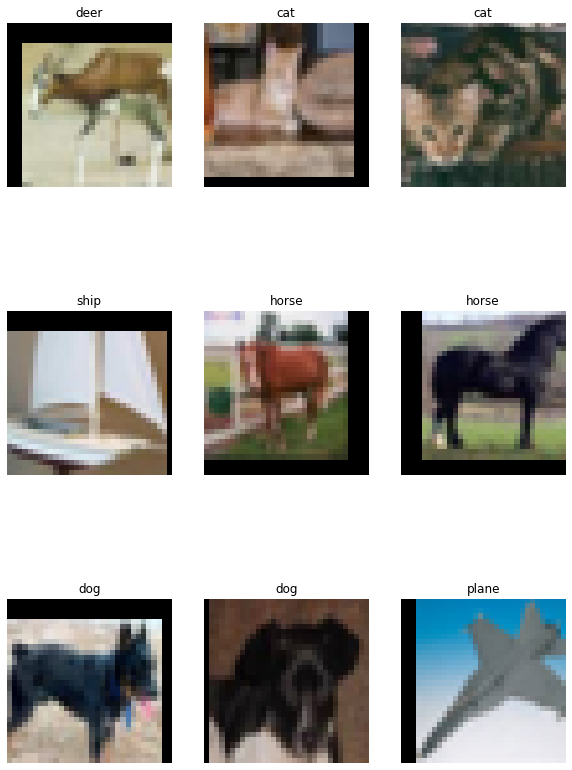

In [12]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='raw')


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

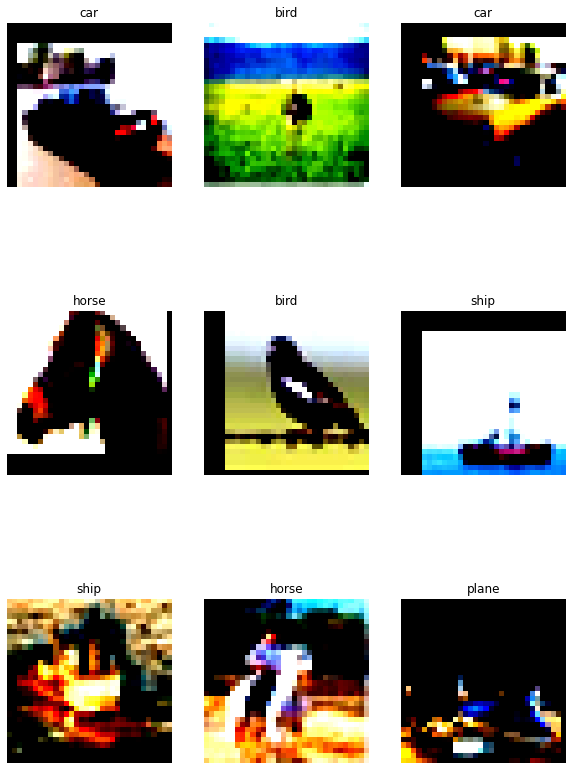

In [13]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [14]:
#get class count
class_count = classcount.get_train_class_count(dataset,classes)
print(class_count)

{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [15]:
#see NN summary
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = Net().to(device) 
model = BasicModel.Net().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,080
           Conv2d-11           [-1, 32, 16, 16]           9,248
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1

In [16]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
#criterion = nn.CrossEntropyLoss()
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=Args.learning_rate, momentum=Args.momentum,weight_decay=Args.weight_decay)
scheduler = StepLR(optimizer, step_size=Args.step_size, gamma=Args.gamma)

In [17]:
#Test
EPOCHS = 15

trainer = train.Trainer()
tester  = test.Tester()

for epoch in range(EPOCHS):
  print("EPOCH:", epoch, "last LR=",scheduler.get_last_lr(), "LR = ", scheduler.get_lr())
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, 5e-4)
  scheduler.step()
  tester.test(model, device, testloader)

test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0 last LR= [0.01] LR =  [0.01]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train set: Loss=2.5435707569122314 Batch_id=390 Accuracy=45.36: 100%|██████████| 391/391 [00:20<00:00, 19.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.9071, Test Accuracy: 5800/10000 (58.00%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.732519268989563 Batch_id=390 Accuracy=60.09: 100%|██████████| 391/391 [00:20<00:00, 19.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.6850, Test Accuracy: 5839/10000 (58.39%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.7210872173309326 Batch_id=390 Accuracy=64.55: 100%|██████████| 391/391 [00:20<00:00, 18.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.0205, Test Accuracy: 6631/10000 (66.31%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.7120857238769531 Batch_id=390 Accuracy=66.57: 100%|██████████| 391/391 [00:20<00:00, 18.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.0407, Test Accuracy: 6413/10000 (64.13%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.8240549564361572 Batch_id=390 Accuracy=68.34: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.6666, Test Accuracy: 6965/10000 (69.65%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=1.5646355152130127 Batch_id=390 Accuracy=69.24: 100%|██████████| 391/391 [00:20<00:00, 19.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.4516, Test Accuracy: 6900/10000 (69.00%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=1.448601484298706 Batch_id=390 Accuracy=76.09: 100%|██████████| 391/391 [00:20<00:00, 19.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.0682, Test Accuracy: 7839/10000 (78.39%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=1.4066513776779175 Batch_id=390 Accuracy=77.98: 100%|██████████| 391/391 [00:20<00:00, 18.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.3455, Test Accuracy: 7844/10000 (78.44%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=1.2354192733764648 Batch_id=390 Accuracy=78.60: 100%|██████████| 391/391 [00:20<00:00, 19.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.3169, Test Accuracy: 7879/10000 (78.79%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=1.2935572862625122 Batch_id=390 Accuracy=79.16: 100%|██████████| 391/391 [00:20<00:00, 18.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.2887, Test Accuracy: 7930/10000 (79.30%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=1.1872637271881104 Batch_id=390 Accuracy=79.32: 100%|██████████| 391/391 [00:20<00:00, 18.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.4057, Test Accuracy: 8002/10000 (80.02%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=1.0820090770721436 Batch_id=390 Accuracy=79.66: 100%|██████████| 391/391 [00:20<00:00, 19.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.4588, Test Accuracy: 7928/10000 (79.28%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=1.0560498237609863 Batch_id=390 Accuracy=81.15: 100%|██████████| 391/391 [00:20<00:00, 19.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6667, Test Accuracy: 8139/10000 (81.39%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=1.0827646255493164 Batch_id=390 Accuracy=81.52: 100%|██████████| 391/391 [00:20<00:00, 19.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6856, Test Accuracy: 8187/10000 (81.87%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.972460150718689 Batch_id=390 Accuracy=81.81: 100%|██████████| 391/391 [00:19<00:00, 19.62it/s]



Test set: Average loss: -5.6442, Test Accuracy: 8159/10000 (81.59%)



In [18]:
# def modify_train_loss_accuracy_from_batch_level_to_epoch_level(train_acc,train_losses,trainloader):
#   new_train_acc=[]
#   sum=0
#   count=0
#   for i in range (len(train_acc)):
#     sum=sum+train_acc[i]
#     count=count+1
#     if count%len(trainloader)==0:
#       new_train_acc.append(sum/len(trainloader))
#       sum=0

#   new_train_loss=[]
#   sum=0
#   count=0
#   for i in range (len(train_losses)):
#     sum=sum+train_losses[i]
#     count=count+1
#     if count%len(trainloader)==0:
#       new_train_loss.append(sum/len(trainloader))
#       sum=0
#   return new_train_acc,new_train_loss

new_train_acc,new_train_loss=useful_utils.modify_train_loss_accuracy_from_batch_level_to_epoch_level(train_acc,train_losses,trainloader)

train_acc_mod=new_train_acc
train_losses_mod=new_train_loss
len(train_acc_mod),len(train_losses_mod),len(new_train_loss)

(15, 15, 15)

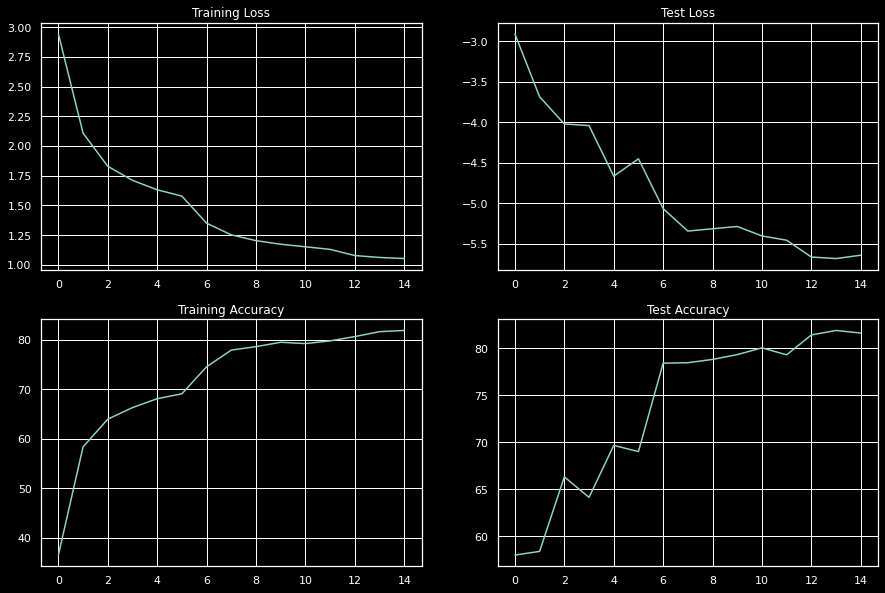

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("dark_background")

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_mod)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_mod)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()

In [20]:
#Save the model
torch.save(model,'./data/cifar')
#load the model
model = torch.load('./data/cifar')
model.eval()

Net(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0, inplace=False)
  )
  (transblock1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  )
  (convblock2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm

In [21]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 77 %
Accuracy of   car : 93 %
Accuracy of  bird : 60 %
Accuracy of   cat : 70 %
Accuracy of  deer : 72 %
Accuracy of   dog : 78 %
Accuracy of  frog : 77 %
Accuracy of horse : 85 %
Accuracy of  ship : 90 %
Accuracy of truck : 88 %


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

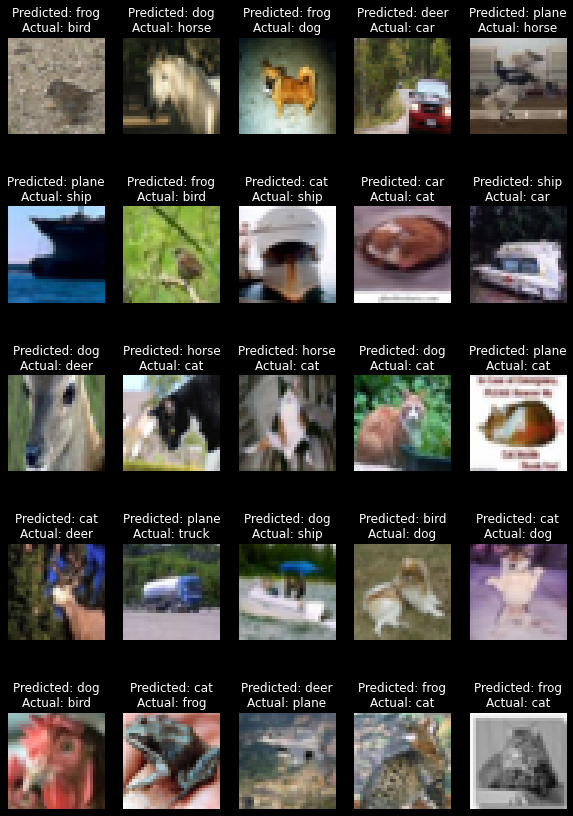

In [22]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes,mean,std,format='raw')

In [23]:
len(train_acc),len(train_losses)

(5865, 5865)